### You work for Motor Trend, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions: ###

* “Is an automatic or manual transmission better for MPG”
* "Quantify the MPG difference between automatic and manual transmissions"

In [1]:
library(datasets)
data(mtcars)

In [2]:
mtcars$cyl <- factor(mtcars$cyl)
mtcars$vs <- factor(mtcars$vs)
mtcars$gear <- factor(mtcars$gear)
mtcars$carb <- factor(mtcars$carb)
mtcars$am <- factor(mtcars$am,labels=c('Automatic','Manual'))

#### 1. Is an automatic or manual transmission better for MPG? ####
Plot a boxplot of MPG by transmission types (Appendix 2).

From the box plot, it seems like manual transmission is better than automatic transmission for MPG.

Conduct a t-test to test the hypothesis.

In [3]:
t.test(mtcars$mpg~mtcars$am)


	Welch Two Sample t-test

data:  mtcars$mpg by mtcars$am
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean in group Automatic    mean in group Manual 
               17.14737                24.39231 


Based on the results, p-value = 0.001374<0.05, we reject the null hypothesis that there is no difference in MPG, and conclude that manual transmission is better than automatic transmission for MPG, with assumption that all other conditions remain unchanged.

#### 2. Quantify the MPG difference between automatic and manual transmissions ####
Here we try to quantify the MPG difference between transmission types, and find if there are other variables that account for the MPG differences.

First, do a multivariate linear regression with all variables.

In [4]:
Multi = lm(data = mtcars, mpg~.)

We use the step function in R for a stepwise regression, where the choice of predictor is carried out automatically by comparing certain criterion, eg AIC.

In [6]:
Best = step(Multi, direction = "both")

Start:  AIC=76.4
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- carb  5   13.5989 134.00 69.828
- gear  2    3.9729 124.38 73.442
- am    1    1.1420 121.55 74.705
- qsec  1    1.2413 121.64 74.732
- drat  1    1.8208 122.22 74.884
- cyl   2   10.9314 131.33 75.184
- vs    1    3.6299 124.03 75.354
<none>              120.40 76.403
- disp  1    9.9672 130.37 76.948
- wt    1   25.5541 145.96 80.562
- hp    1   25.6715 146.07 80.588

Step:  AIC=69.83
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear

       Df Sum of Sq    RSS    AIC
- gear  2    5.0215 139.02 67.005
- disp  1    0.9934 135.00 68.064
- drat  1    1.1854 135.19 68.110
- vs    1    3.6763 137.68 68.694
- cyl   2   12.5642 146.57 68.696
- qsec  1    5.2634 139.26 69.061
<none>              134.00 69.828
- am    1   11.9255 145.93 70.556
- wt    1   19.7963 153.80 72.237
- hp    1   22.7935 156.79 72.855
+ carb  5   13.5989 120.40 76.403

Step:  AIC=67
mpg ~ cyl

In [7]:
summary(Best)


Call:
lm(formula = mpg ~ cyl + hp + wt + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9387 -1.2560 -0.4013  1.1253  5.0513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.70832    2.60489  12.940 7.73e-13 ***
cyl6        -3.03134    1.40728  -2.154  0.04068 *  
cyl8        -2.16368    2.28425  -0.947  0.35225    
hp          -0.03211    0.01369  -2.345  0.02693 *  
wt          -2.49683    0.88559  -2.819  0.00908 ** 
amManual     1.80921    1.39630   1.296  0.20646    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.41 on 26 degrees of freedom
Multiple R-squared:  0.8659,	Adjusted R-squared:  0.8401 
F-statistic: 33.57 on 5 and 26 DF,  p-value: 1.506e-10


The results suggests that the best model includes cyl6, cyl8, hp, wt, and amManual variables. About 86.59% of the variance is explained by this model. Cylinders change negatively with mpg (-3.03miles and -2.16miles for cyl6 and cyl8 respectively), so do with horsepower (-0.03miles), and weight (-2.5miles for every 1,000lb). On the other hand, manual transmission is 1.81mpg better than automatic transmission.

Residual plots seems to be randomly scattered, and some transformation may be needed for linearity (Appendix 3).

### Conclusion ###
On average, manual transmission is better than automatic transmission by 1.81mpg. However, transmission type is not the only factor accounting for MPG, cylinders, horsepower, and weitght are the important factors in affecting the MPG.

### Appendix ###

Appendix 1

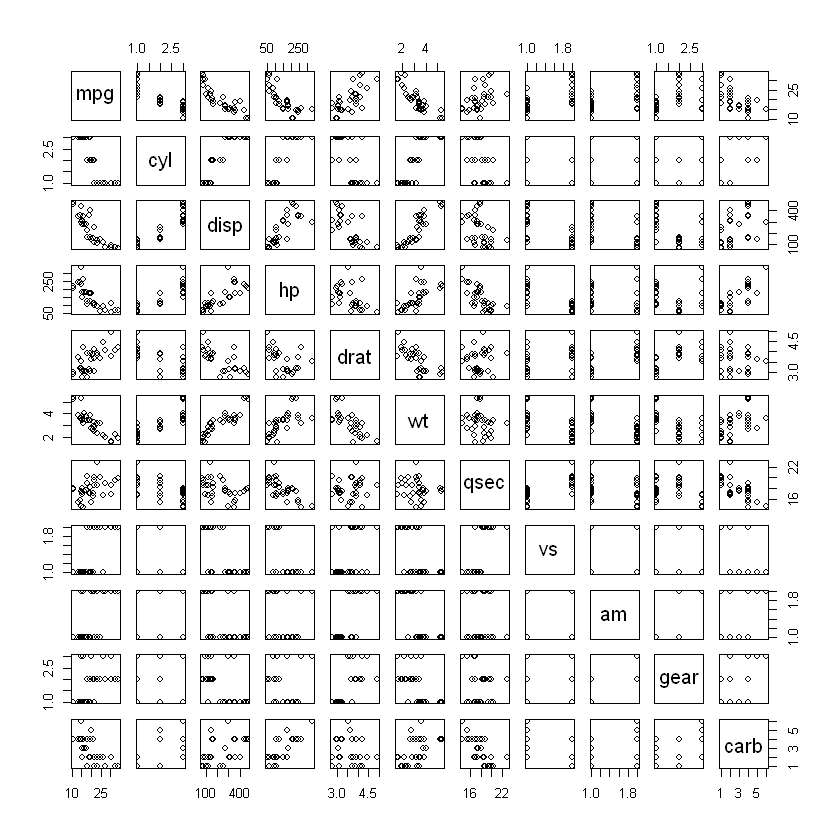

In [8]:
pairs(mtcars)

Appendix 2

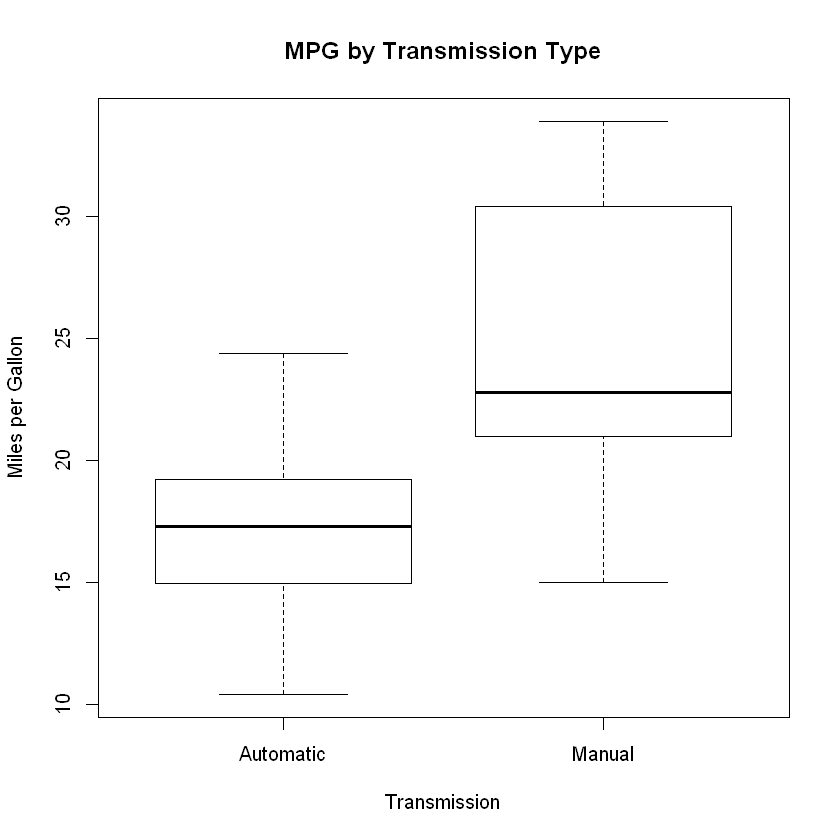

In [9]:
boxplot(mpg~am, data = mtcars,
        xlab = "Transmission",
        ylab = "Miles per Gallon",
        main = "MPG by Transmission Type")

Appendix 3

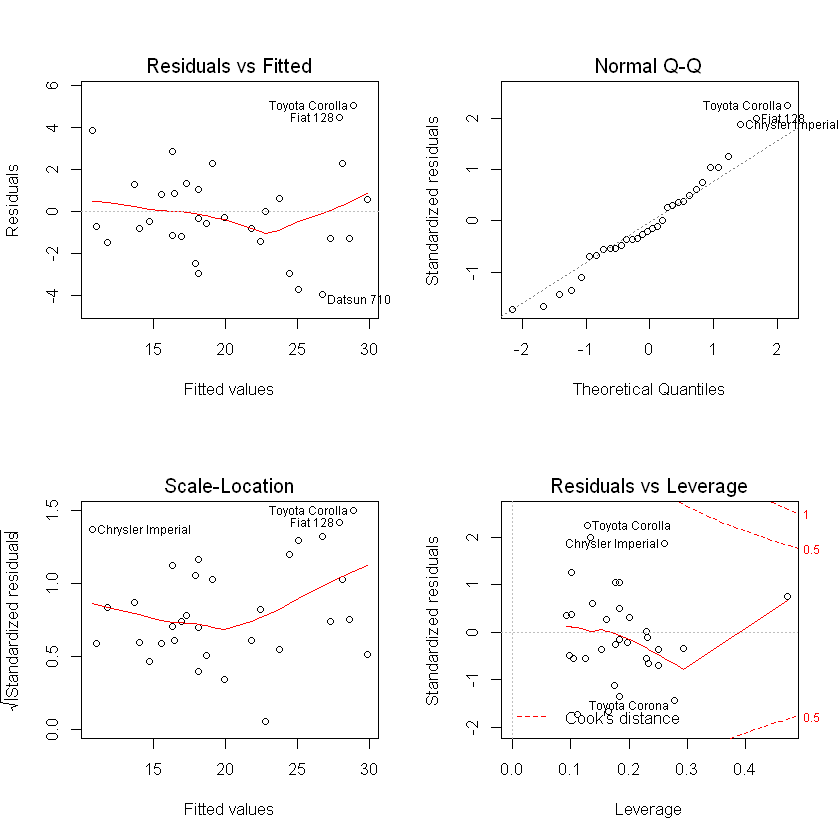

In [10]:
par(mfrow = c(2,2))
plot(Best)